In [3]:
import os 

#### The resnet CPU Energy consumption 

In [4]:
Resnet_CPU_4GPU_PATH = "./CPU_resnet_four_GPU.csv"
Resnet_CPU_3GPU_PATH = "./CPU_resnet_three_GPU.csv"
Resnet_CPU_2GPU_PATH = "./CPU_resnet_two_GPU.csv"
Resnet_CPU_1GPU_PATH = "./CPU_resnet_one_GPU.csv"

In [5]:
def readfile(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 5:
        line = file1.readline()
        if not line:
            break
        print(line)
        count += 1
    
    file1.close()

In [6]:
def getUsage(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 5:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            usage = []
            for item in line:
                usage.append(float(item.split()[0]))
            print(usage)            
            
    file1.close()

In [7]:
def sum_CPU_Energy(filename):
    file1 = open(filename, 'r')
    count = 0
    sum_power = 0
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            power = float(line[0].split()[0])
            if power <= 0:
                print(power)
            if power > 0:
                sum_power += power            
    
    print("Count = {}, sum_power = {} W".format(count, sum_power))
    file1.close()

In [8]:
sum_CPU_Energy(Resnet_CPU_1GPU_PATH)

-65483.9
-65481.9
-65479.6
-65472.0
-65467.1
Count = 5493, sum_power = 303015.76019999903 W


In [9]:
sum_CPU_Energy(Resnet_CPU_2GPU_PATH)

-65456.9
-65452.7
-65455.0
-65435.8
Count = 3071, sum_power = 260969.06890000016 W


In [10]:
sum_CPU_Energy(Resnet_CPU_3GPU_PATH)

-65422.7
-65425.3
-65407.6
Count = 2389, sum_power = 255608.24070000008 W


In [11]:
sum_CPU_Energy(Resnet_CPU_4GPU_PATH)

-65392.3
-65386.0
-65401.2
-65444.9
Count = 1786, sum_power = 231322.80089999983 W


### Resnet CPU usage 

In [12]:
def CPU_Usage(filename):
    file1 = open(filename, 'r')
    count = 0
    cpu_usage = []
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            cpu_usage.append([float(line[1].split()[0]), float(line[2].split()[0])])

    file1.close()        
    return cpu_usage        
    

In [21]:
import matplotlib.pyplot as plt

def draw_CPU_Usage(cpu_usage, filename):
    time = []
    usage = []
    for item in cpu_usage:
        usage.append(item[0])
        time.append(item[1])
    
    plt.figure(figsize=(10, 4))
    plt.plot(time, usage, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('CPU usage %')
    plt.savefig(filename + '.png')
    plt.show()

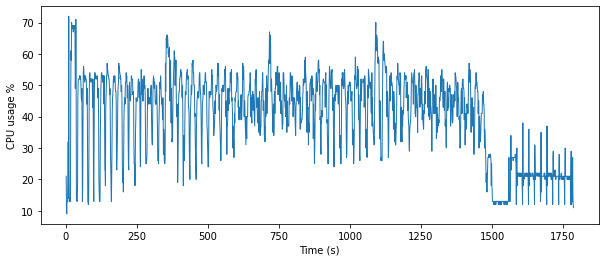

In [22]:
Resnet_CPU_4GPU_Usage = CPU_Usage(Resnet_CPU_4GPU_PATH)
draw_CPU_Usage(Resnet_CPU_4GPU_Usage, 'Resnet_CPU_4GPU_Usage')

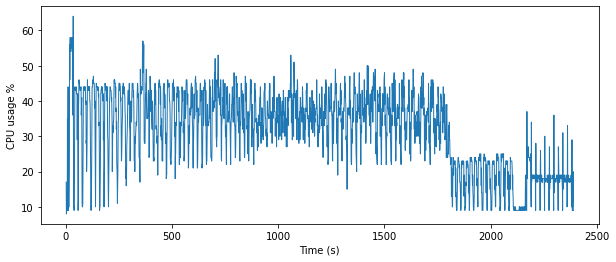

In [23]:
Resnet_CPU_3GPU_Usage = CPU_Usage(Resnet_CPU_3GPU_PATH)
draw_CPU_Usage(Resnet_CPU_3GPU_Usage, 'Resnet_CPU_3GPU_Usage')

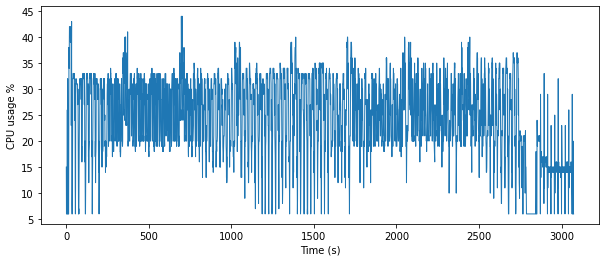

In [24]:
Resnet_CPU_2GPU_Usage = CPU_Usage(Resnet_CPU_2GPU_PATH)
draw_CPU_Usage(Resnet_CPU_2GPU_Usage, 'Resnet_CPU_2GPU_Usage')

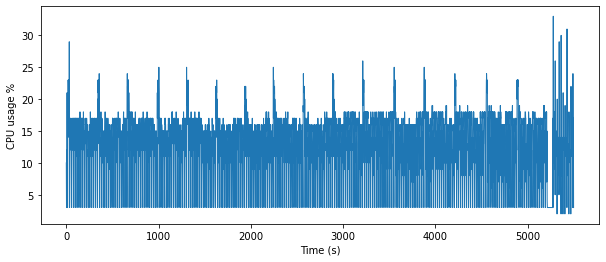

In [25]:
Resnet_CPU_1GPU_Usage = CPU_Usage(Resnet_CPU_1GPU_PATH)
draw_CPU_Usage(Resnet_CPU_1GPU_Usage, 'Resnet_CPU_1GPU_Usage')